In [1]:
# Codveda Internship - Level 3
# Task: classfication on churn-bigml-20

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/churn-bigml-20.csv')

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


handle categorical variables

In [5]:
df['International plan']= df['International plan'].map({'Yes':1,'No':0})
df['Voice mail plan']= df['Voice mail plan'].map({'Yes':1,'No':0})

In [7]:
df['Churn']= df['Churn'].map({True:1,False:0})

In [9]:
df.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    int64  
 4   Voice mail plan         667 non-null    int64  
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [16]:
x=df.drop(['Churn', 'State'],axis=1)
y=df['Churn']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

feature scaling

In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Train and test multiple classification models

In [20]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

Evaluate models

In [22]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(f"\n🔹 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


🔹 Logistic Regression Results:
Accuracy: 0.917910447761194
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       119
           1       0.70      0.47      0.56        15

    accuracy                           0.92       134
   macro avg       0.82      0.72      0.76       134
weighted avg       0.91      0.92      0.91       134


🔹 Decision Tree Results:
Accuracy: 0.9253731343283582
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       119
           1       0.63      0.80      0.71        15

    accuracy                           0.93       134
   macro avg       0.80      0.87      0.83       134
weighted avg       0.94      0.93      0.93       134


🔹 Random Forest Results:
Accuracy: 0.9701492537313433
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       119
           1       0.92      0.80      0.86        15

    accuracy

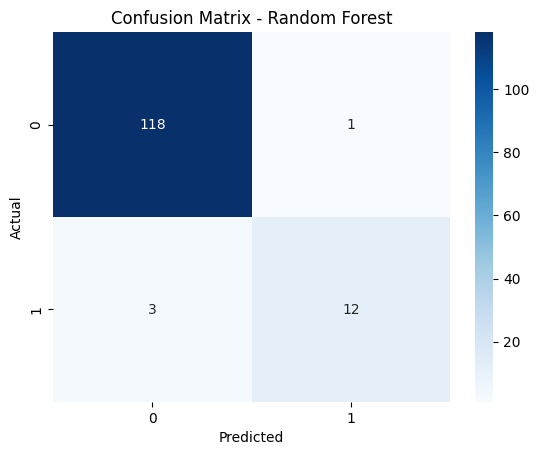

In [23]:
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Perform hyperparameter tuning using grid search.


🚀 Performing Grid Search for Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.1}
Best Cross-Validation Accuracy for Logistic Regression: 0.8535531652265915

🔹 Logistic Regression Results (after tuning):
Accuracy: 0.9328358208955224
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       119
           1       0.88      0.47      0.61        15

    accuracy                           0.93       134
   macro avg       0.91      0.73      0.79       134
weighted avg       0.93      0.93      0.92       134



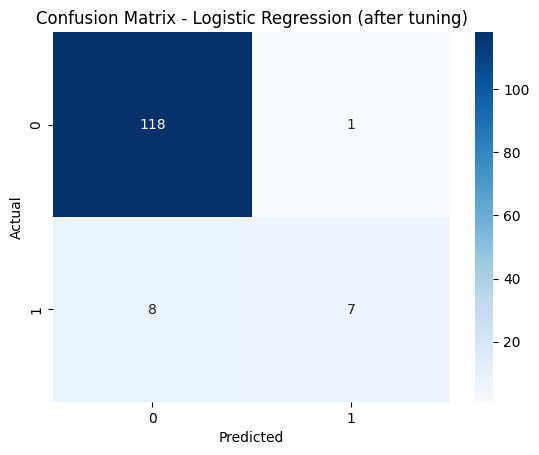


🚀 Performing Grid Search for Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 20}
Best Cross-Validation Accuracy for Decision Tree: 0.9118144947980955

🔹 Decision Tree Results (after tuning):
Accuracy: 0.9552238805970149
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       119
           1       0.80      0.80      0.80        15

    accuracy                           0.96       134
   macro avg       0.89      0.89      0.89       134
weighted avg       0.96      0.96      0.96       134



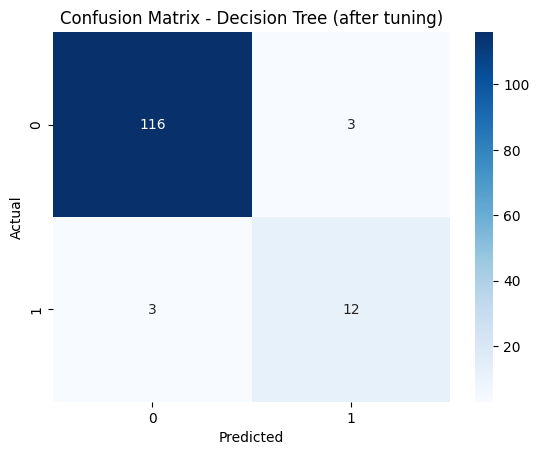


🚀 Performing Grid Search for Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy for Random Forest: 0.8986598483512607

🔹 Random Forest Results (after tuning):
Accuracy: 0.9626865671641791
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       119
           1       0.92      0.73      0.81        15

    accuracy                           0.96       134
   macro avg       0.94      0.86      0.90       134
weighted avg       0.96      0.96      0.96       134



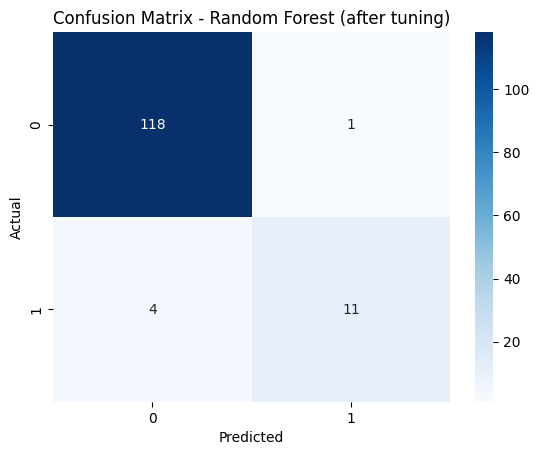

In [25]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Increased range for C
    },
    "Decision Tree": {
        'max_depth': [None, 3, 5, 10, 15, 20], # Added more depth options
        'min_samples_split': [2, 5, 10, 20], # Added more split options
        'min_samples_leaf': [1, 2, 4, 8] # Added more leaf options
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200, 300], # Added more estimators
        'max_depth': [None, 5, 10, 20, 30], # Added more depth options
        'min_samples_split': [2, 5, 10, 20], # Added more split options
        'min_samples_leaf': [1, 2, 4, 8] # Added more leaf options
    }
}

# Perform Grid Search for each model
for name, model in models.items():
    print(f"\n🚀 Performing Grid Search for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy for {name}: {grid_search.best_score_}")

    # Evaluate on the test set with the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)

    print(f"\n🔹 {name} Results (after tuning):")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name} (after tuning)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()